In [1]:
import json
import matplotlib.pyplot as plt
import sys

import numpy as np
import sklearn
import keras
import pickle

import os
os.chdir("..")

sys.path += ["test"]
from train_regression import get_unique_X_y
from predict_pf import set_pred_to_zero

Using TensorFlow backend.


setGPU: Setting GPU to: 1


In [2]:
from matplotlib.colors import LogNorm

In [3]:
training_info = json.load(open("regression.json"))

(0, 0.1)

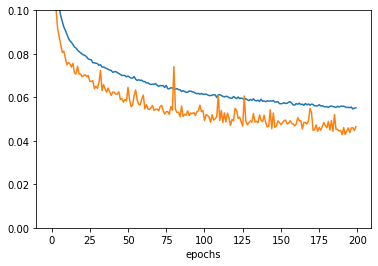

In [4]:
plt.plot(training_info["loss"])
plt.plot(training_info["val_loss"])
plt.xlabel("epochs")
plt.ylim(0,0.1)

In [5]:
all_Xs = []
all_ys = []
for i in range(500):
    for j in range(6,7):
        fn = "data/TTbar/191009_155100/step3_AOD_{1}_ev{0}.npz".format(i, j)
        print("Loading {0}".format(fn))
        fi = open(fn, "rb")
        data = np.load(fi)

        Xs, ys = get_unique_X_y(data["elements"], data["element_block_id"], data["candidates"], data["candidate_block_id"])

        all_Xs += [Xs]
        all_ys += [ys]
all_Xs = np.vstack(all_Xs)
all_ys = np.vstack(all_ys)

Loading data/TTbar/191009_155100/step3_AOD_6_ev0.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev1.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev2.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev3.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev4.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev5.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev6.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev7.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev8.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev9.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev10.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev11.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev12.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev13.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev14.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev15.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev16.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev17.npz
Loading data/TTbar/191009_155100/step3

Loading data/TTbar/191009_155100/step3_AOD_6_ev151.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev152.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev153.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev154.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev155.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev156.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev157.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev158.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev159.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev160.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev161.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev162.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev163.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev164.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev165.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev166.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev167.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev168.npz
Loading da

Loading data/TTbar/191009_155100/step3_AOD_6_ev300.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev301.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev302.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev303.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev304.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev305.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev306.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev307.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev308.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev309.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev310.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev311.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev312.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev313.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev314.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev315.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev316.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev317.npz
Loading da

Loading data/TTbar/191009_155100/step3_AOD_6_ev449.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev450.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev451.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev452.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev453.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev454.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev455.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev456.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev457.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev458.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev459.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev460.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev461.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev462.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev463.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev464.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev465.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev466.npz
Loading da

In [6]:
X_types = all_Xs[:, :, 0]
X_kin = all_Xs[:, :, 1:]
X_kin = X_kin.reshape((X_kin.shape[0], X_kin.shape[1]*X_kin.shape[2]))

In [7]:
with open("preprocessing.pkl", "rb") as fi:
    preproc = pickle.load(fi)

In [8]:
enc_X = preproc["enc_X"]
scaler_X = preproc["scaler_X"]
enc_y = preproc["enc_y"]
scaler_y = preproc["scaler_y"]
num_onehot_y = 27

In [9]:
trf = enc_X.transform(X_types)
X = np.hstack([trf, scaler_X.transform(X_kin)])

In [10]:
model2 = keras.models.load_model("regression.h5")





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [11]:
pred2 = model2.predict(X, batch_size=100000)

In [25]:
cand_types = enc_y.inverse_transform(pred2[:, :num_onehot_y])
ncand = (cand_types!=0).sum(axis=1)
ncand_true = (all_ys[:, :, 0]!=0).sum(axis=1)

cand_momenta = scaler_y.inverse_transform(pred2[:, num_onehot_y:])
set_pred_to_zero(cand_momenta, ncand)
cand_momenta = cand_momenta.reshape((cand_momenta.shape[0], 3, 3))

In [95]:
def text_in_box(mat):
    for i in range(len(mat)):
        for j in range(len(mat)):
            plt.text(i, j, "{0:.3f}".format(mat[i,j]), ha="center", va="center")

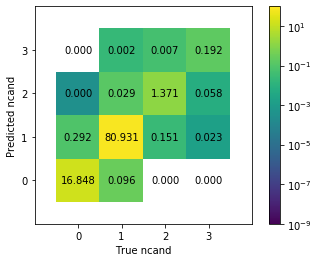

In [96]:
labels = [0,1,2,3]
confusion_matrix_ncand = sklearn.metrics.confusion_matrix(ncand_true, ncand, labels=labels)
confusion_matrix_ncand = confusion_matrix_ncand / np.sum(confusion_matrix_ncand)
plt.imshow(confusion_matrix_ncand*100, norm=LogNorm(vmin=1e-9, vmax=100))
plt.xticks(range(len(labels)), labels=[int(x) for x in labels])
plt.yticks(range(len(labels)), labels=[int(x) for x in labels])
plt.xlim(-1,4)
plt.ylim(-1,4)
plt.colorbar()
plt.xlabel("True ncand")
plt.ylabel("Predicted ncand")
text_in_box(confusion_matrix_ncand*100)

In [83]:
confusion_matrix_ncand[2]

array([3.28594994e-06, 1.51044165e-03, 1.37122691e-02, 7.11955819e-05])

In [100]:
labels = np.unique(all_ys[:, :, 0])
confusion_matrix = sklearn.metrics.confusion_matrix(all_ys[:, :, 0].flatten(), cand_types.flatten(), labels=labels)
confusion_matrix = confusion_matrix / np.sum(confusion_matrix)

([<matplotlib.axis.YTick at 0x7f9a52c65be0>,
 <a list of 9 Text yticklabel objects>)

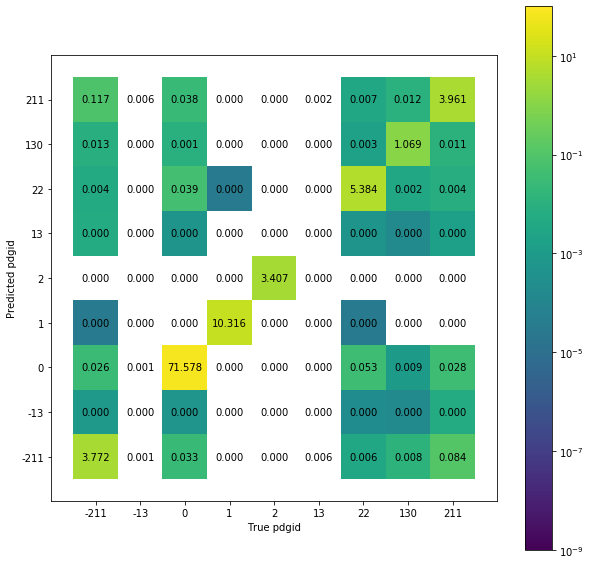

In [101]:
plt.figure(figsize=(10,10))
plt.imshow(confusion_matrix*100, norm=LogNorm(vmin=1e-9, vmax=100))
plt.xlim(-1,9)
plt.ylim(-1,9)
plt.colorbar()
plt.xlabel("True pdgid")
plt.ylabel("Predicted pdgid")
text_in_box(confusion_matrix*100)
plt.xticks(range(len(labels)), labels=[int(x) for x in labels])
plt.yticks(range(len(labels)), labels=[int(x) for x in labels])

In [15]:
#all cases where there was a true particle and it was also reconstructed
msk = (all_ys[:, :, 0].flatten()!=0) & (cand_types.flatten() != 0)

Text(0.5, 1.0, 'Baseline PF block algo regression')

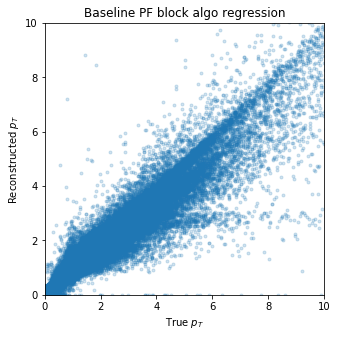

In [49]:
plt.figure(figsize=(5,5))
plt.scatter(all_ys[:, :, 1].flatten()[msk], cand_momenta[:, :, 0].flatten()[msk], alpha=0.2, marker=".")
plt.xlim(0,10)
plt.ylim(0,10)
plt.xlabel("True $p_T$")
plt.ylabel("Reconstructed $p_T$")
plt.title("Baseline PF block algo regression")

Text(0.5, 1.0, 'Baseline PF block algo regression')

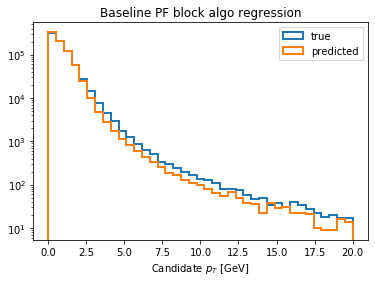

In [50]:
b = np.linspace(0, 20, 40)
plt.hist(all_ys[:, :, 1].flatten()[msk], bins=b, histtype="step", lw=2, label="true");
plt.hist(cand_momenta[:, :, 0].flatten()[msk], bins=b, histtype="step", lw=2, label="predicted");
plt.yscale("log")
plt.legend()
plt.xlabel("Candidate $p_T$ [GeV]")
plt.title("Baseline PF block algo regression")

(-6, 6)

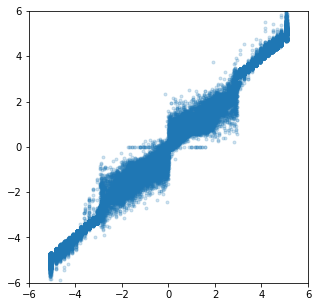

In [18]:
plt.figure(figsize=(5,5))
plt.scatter(all_ys[:, :, 2].flatten()[msk], cand_momenta[:, :, 1].flatten()[msk], alpha=0.2, marker=".")
plt.xlim(-6,6)
plt.ylim(-6,6)

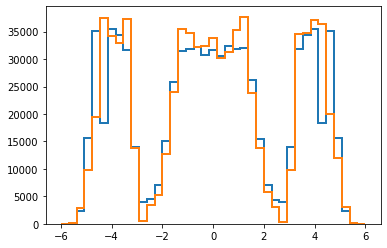

In [19]:
b = np.linspace(-6, 6, 40)
plt.hist(all_ys[:, :, 2].flatten()[msk], bins=b, histtype="step", lw=2, label="true");
plt.hist(cand_momenta[:, :, 1].flatten()[msk], bins=b, histtype="step", lw=2, label="predicted");
plt.legend()
plt.xlabel("Candidate $p_T$ [GeV]")

(-4, 4)

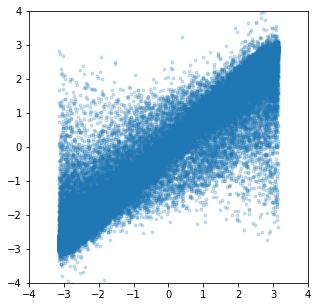

In [20]:
plt.figure(figsize=(5,5))
plt.scatter(all_ys[:, :, 3].flatten()[msk], cand_momenta[:, :, 2].flatten()[msk], alpha=0.2, marker=".")
plt.xlim(-4,4)
plt.ylim(-4,4)

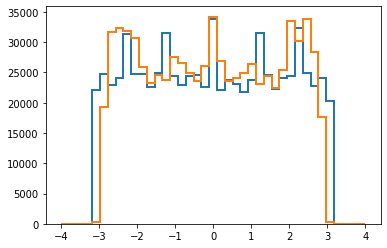

In [21]:
b = np.linspace(-4, 4, 40)
plt.hist(all_ys[:, :, 3].flatten()[msk], bins=b, histtype="step", lw=2);
plt.hist(cand_momenta[:, :, 2].flatten()[msk], bins=b, histtype="step", lw=2);